In [78]:
import csv

# text_classification, fspc_poem, fspc
def read_ground_truth(dataset_name):
    with open(f'../data/{dataset_name}/test.tsv') as f:
        reader = csv.reader(f, delimiter='\t')
        next(reader)
        if dataset_name == 'text_classification':
            labels = list(l for l, _ in reader)
        else:
            labels = list(l for _, l in reader)
    return labels
            
# text_classification, fspc_poem, fspc
# guwenbert, chinese-roberta-wwm
def read_preds(dataset_name, model_name):
    with open(f'../output/{model_name}/{dataset_name}/predict_results.txt') as f:
        reader = csv.reader(f, delimiter='\t')
        next(reader)
        preds = list(l for i, l in reader)
    return preds



In [80]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sn


font_name = 'WenQuanYi Micro Hei' 
plt.rcParams['font.sans-serif'] = [font_name]  # 中文字体设置-黑体
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

sn.set(font=font_name, font_scale=1.3)  # 解决Seaborn中文显示问题

def polt(dataset_name, model_name):
    if dataset_name == 'text_classification':
        classes = ['易藏', '医藏', '艺藏', '史藏', '佛藏', '集藏', '诗藏', '子藏', '儒藏', '道藏']
    else:
        classes = ['1', '2', '3', '4', '5']
    labels = read_ground_truth(dataset_name)
    preds = read_preds(dataset_name, model_name)

    array = confusion_matrix(labels, preds, labels=classes)
    df_cm = pd.DataFrame(array, index = classes,
                      columns =classes)
    if dataset_name == 'text_classification':
        plt.figure(figsize = (10,8))
    sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}, fmt="", cmap="YlGnBu") # font size

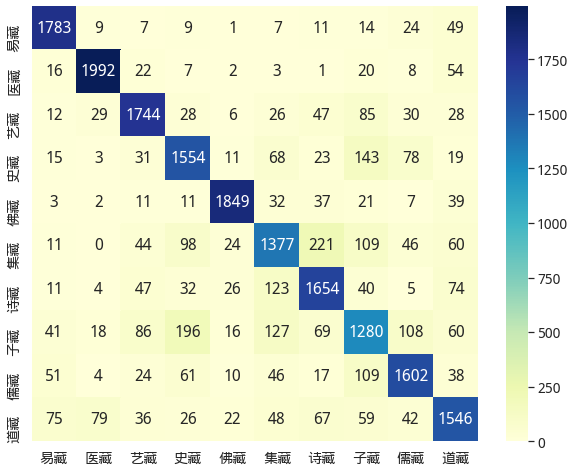

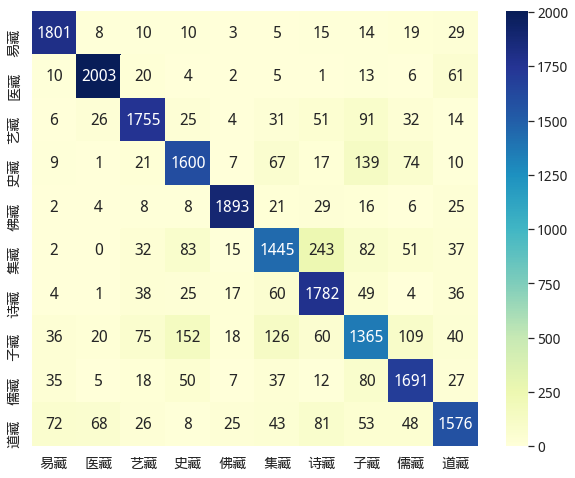

In [84]:
polt('text_classification', 'chinese-roberta-wwm')
polt('text_classification', 'guwenbert')

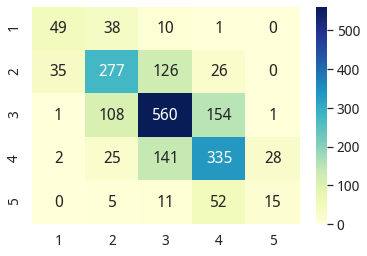

In [91]:
polt('fspc', 'guwenbert')

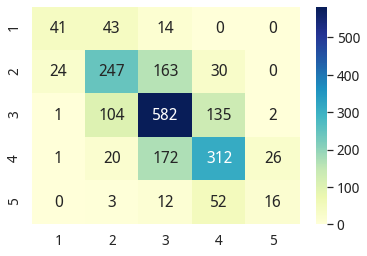

In [92]:
polt('fspc', 'chinese-roberta-wwm')

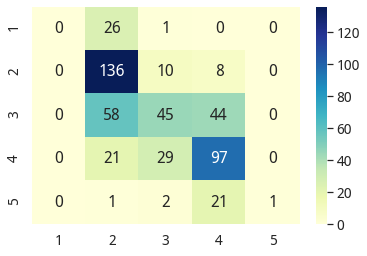

In [93]:
polt('fspc_poem', 'guwenbert')

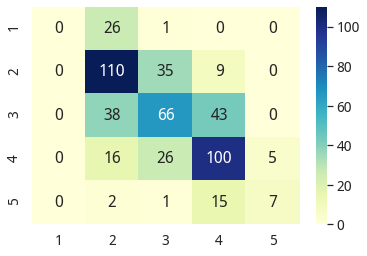

In [94]:
polt('fspc_poem', 'chinese-roberta-wwm')